In [1]:
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.costs_ = []
        
        for _ in range(self.n_iter):
            errors = y - self.net_input(X)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.costs_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [2]:
a1 = AdalineGD()

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-1, -1, 1])

a1.fit(X, y)

print('Whts: \n' + str(a1.w_))
print('Costs: \n' + str(a1.costs_))

Whts: 
[-0.44578664  0.30548381 -0.14030283]
Costs: 
[1.5, 1.4809999999999999, 1.46333672, 1.4459500043839999, 1.4288308298430079, 1.411975058012906, 1.3953786359717286, 1.3790375732572566, 1.3629479408066119, 1.3471058700110825, 1.3315075517859505, 1.3161492356546314, 1.3010272288469045, 1.2861378954110192, 1.271477655339464, 1.2570429837081849, 1.2428304098290486, 1.2288365164153461, 1.2150579387601379, 1.2014913639272393, 1.1881335299546545, 1.1749812250702671, 1.1620312869195977, 1.1492806018054447, 1.1367261039392229, 1.1243647747038223, 1.1121936419278082, 1.1002097791707892, 1.0884103050197813, 1.0767923823963972, 1.0653532178746956, 1.0540900610095281, 1.0430002036752177, 1.0320809794144161, 1.0213297627969755, 1.0107439687886894, 1.0003210521297425, 0.99005850672272655, 0.97995386503007165, 0.97000469748074813, 0.96020861188609841, 0.95056325286465726, 0.94106630127581936, 0.93171547366222396, 0.92250852170071884, 0.913443231661768, 0.90451742387718415, 0.89572895221604298, 0.

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


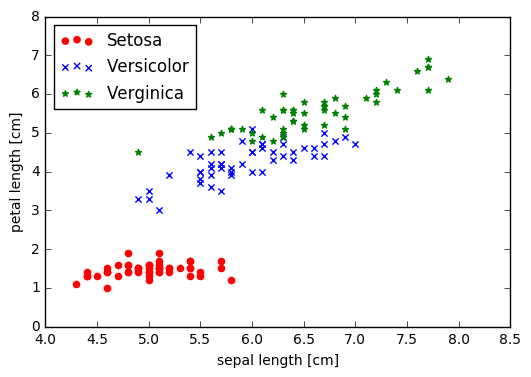

In [4]:
import matplotlib.pyplot as plt

y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='*', label='Verginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Classifyi j 2 species: Setosa vs Versicolor
X = X[0:100]
y = y[0:100]

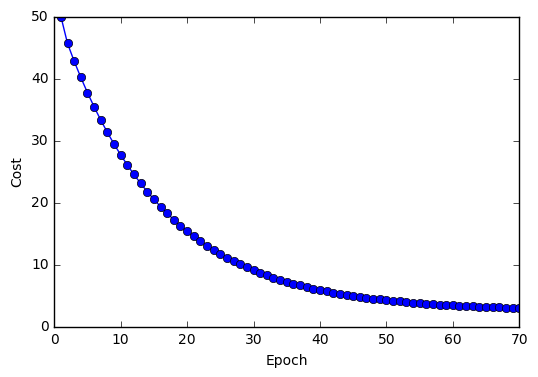

In [5]:
aln = AdalineGD(eta=0.0003, n_iter=70)
aln.fit(X, y)
plt.plot(range(1, len(aln.costs_) + 1), aln.costs_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

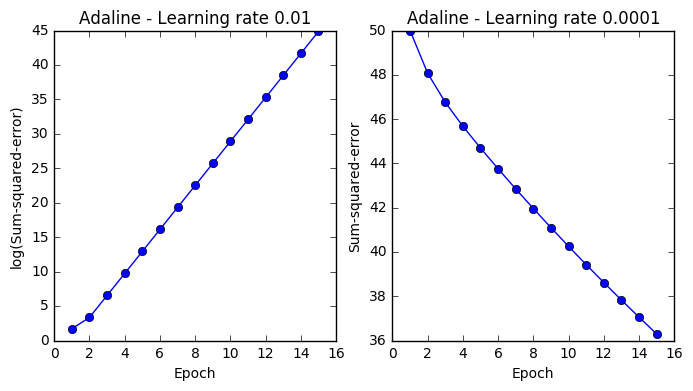

In [6]:
# Examine hyperparameter eta(lrni rt)
eta1 = 0.01
eta2 = 0.0001

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

aln1 = AdalineGD(n_iter=15, eta=eta1).fit(X, y)
ax[0].plot(range(1, len(aln1.costs_) + 1),
           np.log10(aln1.costs_), marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

aln2 = AdalineGD(n_iter=15, eta=eta2).fit(X, y)
ax[1].plot(range(1, len(aln2.costs_) + 1),
           aln2.costs_, marker='o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

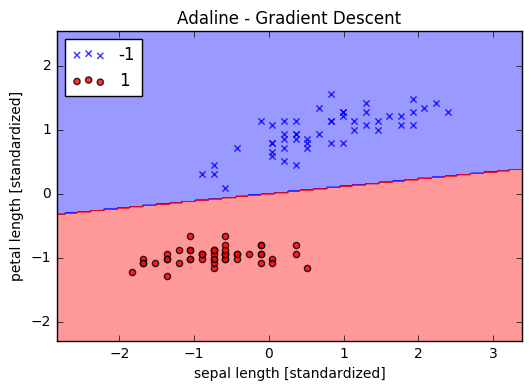

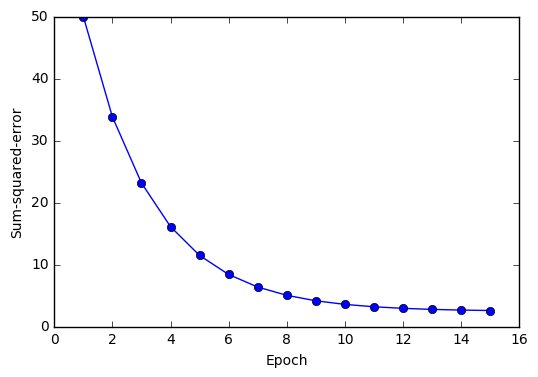

In [8]:
# Standardizatn
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.costs_) + 1), ada.costs_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.show()